Best-fit line: Current (mA) = 29458609084199457242491125760.0000 * Voltage (V) + 19949931618082562646959194112.0000


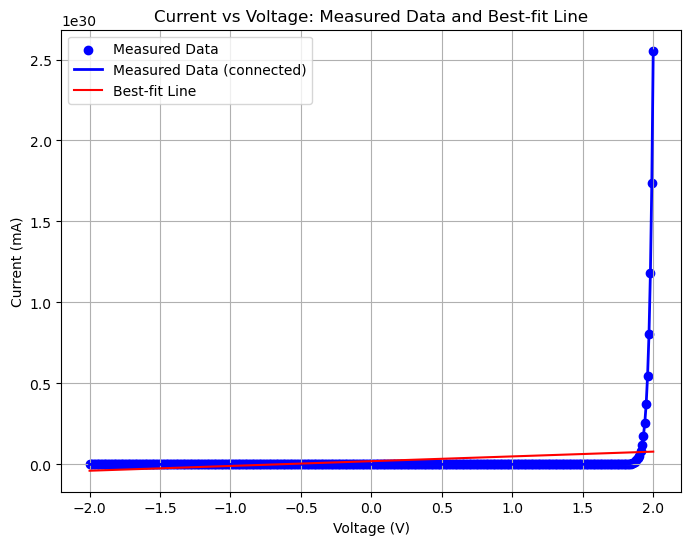

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the CSV file
df = pd.read_csv('./Downloads/diode_voltage_vs_current_lookup.csv')

# Assuming the CSV has the column 'Current (A)' in amperes
# Convert current from amperes to milliamperes (mA)
df['Current (mA)'] = df['Current (A)'] * 1e3  # converting to mA

# Extract voltage and current data
voltage_data = df['Voltage (V)'].values.reshape(-1, 1)  # Reshaping for sklearn compatibility
current_data = df['Current (mA)'].values  # No need to reshape current for fitting

# Fit a linear regression model (best-fit line)
model = LinearRegression()
model.fit(voltage_data, current_data)

# Get the best-fit line
fitted_current = model.predict(voltage_data)

# Print the slope and intercept of the best-fit line
slope = model.coef_[0]
intercept = model.intercept_
print(f"Best-fit line: Current (mA) = {slope:.4f} * Voltage (V) + {intercept:.4f}")

# Plot the actual data and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(voltage_data, current_data, color='blue', label='Measured Data')  # Scatter plot for measured data
plt.plot(voltage_data, current_data, color='blue', linewidth=2, label='Measured Data (connected)')  # Connect data points with a solid blue line
plt.plot(voltage_data, fitted_current, 'r-', label='Best-fit Line')  # Best-fit line
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.title('Current vs Voltage: Measured Data and Best-fit Line')
plt.legend()
plt.grid(True)
plt.show()



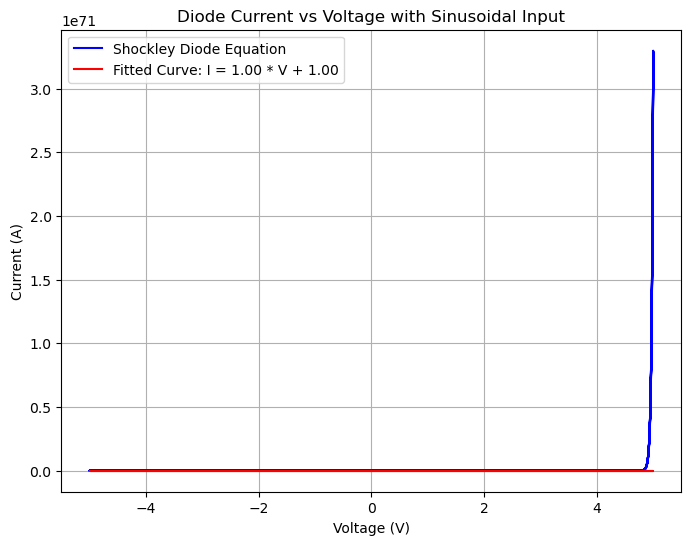

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def diode(amplitude, frequency, time, resistance, n=1, Is=1e-12, Vt=0.026):
    """
    Simulates the I-V characteristics of a diode using a sinusoidal voltage input.

    Parameters:
    - amplitude: Peak voltage of the sinusoidal wave
    - frequency: Frequency of the sinusoidal wave in Hz
    - time: Time duration over which to simulate the wave (in seconds)
    - resistance: Series resistance in the circuit (Ohms)
    - n: Ideality factor of the diode (default is 1)
    - Is: Saturation current of the diode (default is 1e-12 A)
    - Vt: Thermal voltage (default is 0.026 V at room temperature)

    This function plots the I-V curve with the sinusoidal voltage as input.
    """

    # Generate time points
    t = np.linspace(0, time, 1000)

    # Generate sinusoidal voltage input
    voltage = amplitude * np.sin(2 * np.pi * frequency * t)

    # Define the Shockley diode equation
    def diode_current(V, n, Is, Vt):
        return Is * (np.exp(V / (n * Vt)) - 1)

    # Calculate current using the Shockley diode equation
    current = diode_current(voltage, n, Is, Vt)

    # Optional: If there's a series resistance, apply Ohm's Law to get actual current
    # current = voltage / resistance

    # Perform curve fitting using scipy's curve_fit function
    def linear_model(V, a, b):
        return a * V + b
    
    # Curve fitting for the generated data
    params, covariance = curve_fit(linear_model, voltage, current)
    
    # Extract the fitting parameters
    a, b = params

    # Generate fitted current values based on the model
    fitted_current = linear_model(voltage, a, b)

    # Plot the original data and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.plot(voltage, current, label='Shockley Diode Equation', color='blue')
    plt.plot(voltage, fitted_current, label=f'Fitted Curve: I = {a:.2f} * V + {b:.2f}', color='red')
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current (A)')
    plt.title('Diode Current vs Voltage with Sinusoidal Input')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
diode(amplitude=5, frequency=50, time=0.1, resistance=1000)


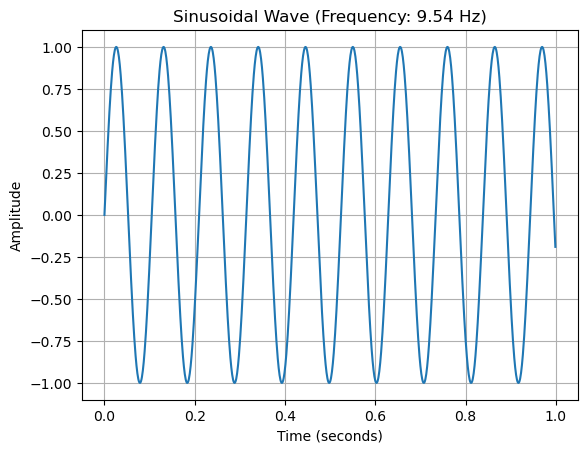

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the sinusoidal wave
amplitude = 1        # Amplitude of the wave
frequency = 5        # Frequency in Hertz (Hz)
time_period = 1 / frequency
sampling_rate = 1000  # Samples per second
time = np.arange(0, 1, 1 / sampling_rate)  # Time vector from 0 to 1 second

# Generating the sinusoidal wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Plotting the wave
plt.plot(time, sine_wave)
plt.title("Sinusoidal Wave (Frequency: {} Hz)".format(frequency))
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


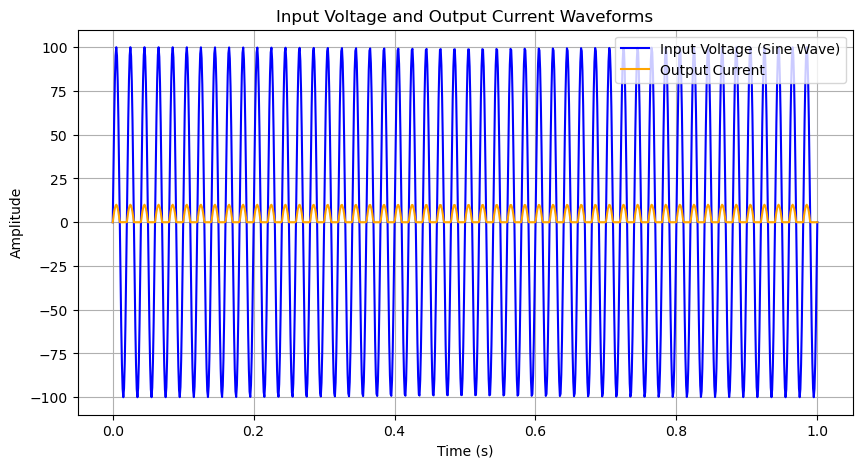

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./Downloads/diode_voltage_vs_current_lookup.csv')  # Adjust the file path as needed
voltage = data['Voltage (V)']  # Assuming 'Voltage' is the column name
current = data['Current (A)']  # Assuming 'Current' is the column name

# Generate a sine wave for input voltage
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector for 1 second
frequency = 50  # Frequency of the sine wave
input_voltage = 100*np.sin(2 * np.pi * frequency * t)

# Calculate output current based on the dataset
output_current = np.interp(input_voltage, voltage, current)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(t, input_voltage, label='Input Voltage (Sine Wave)', color='blue')
plt.plot(t, output_current, label='Output Current', color='orange')
plt.title('Input Voltage and Output Current Waveforms')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


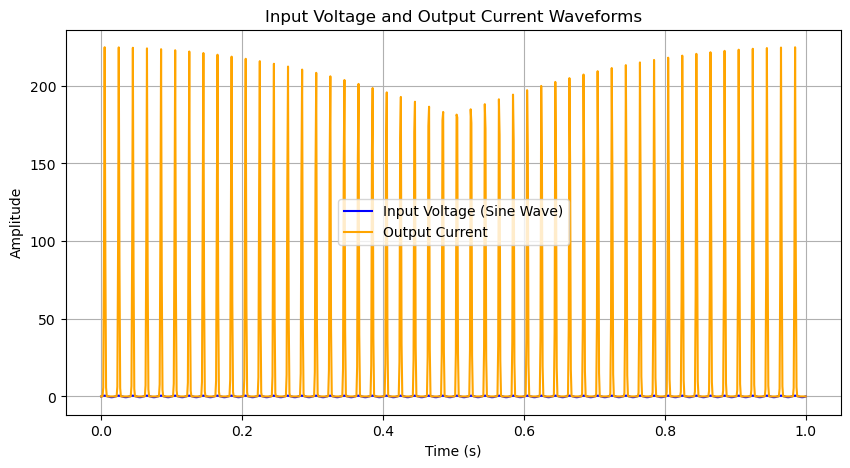

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./Downloads/diode_voltage_vs_current_lookup.csv')  # Adjust the file path as needed
voltage = data['Voltage (V)']  # Assuming 'Voltage' is the column name
current = data['Current (A)']  # Assuming 'Current' is the column name
# Generate a sine wave for input voltage
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector for 1 second
frequency = 50  # Frequency of the sine wave
input_voltage = 0.5*np.sin(2 * np.pi * frequency * t)

# Calculate output current based on the dataset
output_current = np.interp(input_voltage, voltage, current)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(t, input_voltage, label='Input Voltage (Sine Wave)', color='blue')
plt.plot(t, output_current, label='Output Current', color='orange')
plt.title('Input Voltage and Output Current Waveforms')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()



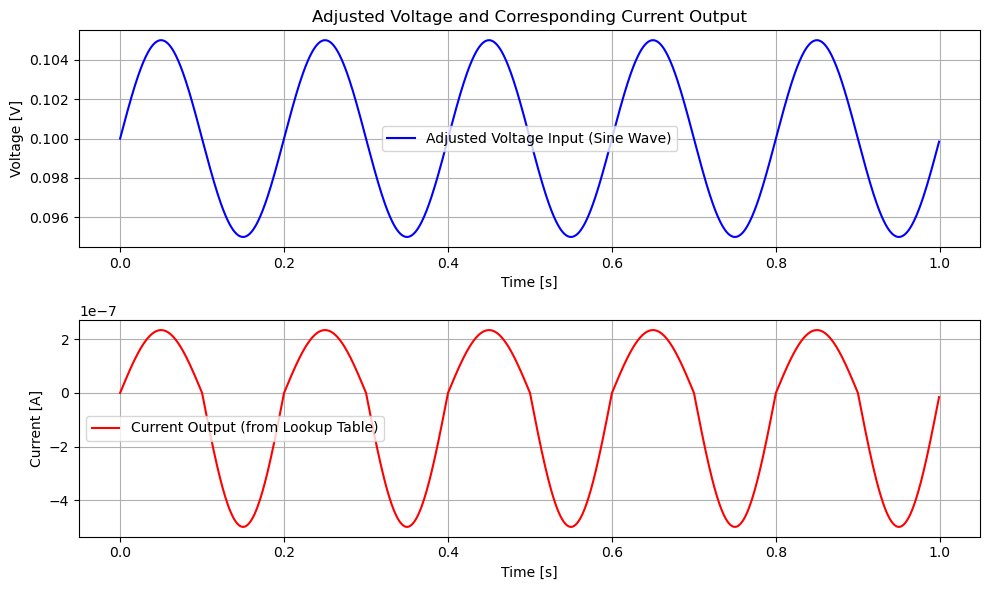

In [22]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Load the lookup table from the CSV file
lookup_table = pd.read_csv('./Downloads/diode_voltage_vs_current_lookup.csv')

# Extract voltage and current from the lookup table
voltage_lookup = lookup_table['Voltage (V)'].values
current_lookup = lookup_table['Current (A)'].values

# Step 3: Generate the sine wave voltage input
frequency = 5  # Frequency of the sine wave in Hz
amplitude = 0.5  # Amplitude of the sine wave (1V peak)
sampling_rate = 1000  # Sampling rate in samples per second
duration = 1  # Duration of the sine wave in seconds

# Create the time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the sine wave for voltage input
voltage_input = 0.01 * amplitude * np.sin(2 * np.pi * frequency * t)

# Step 4: Adjust the voltage input by adding 0.1V without changing the current mapping
adjusted_voltage_input = voltage_input + 0.1

# Interpolate based on the original lookup table voltage for current (voltage -> current)
# Using the original voltage_input for current interpolation (no change in current)
current_output = np.interp(voltage_input, voltage_lookup, current_lookup)

# Step 5: Plot both adjusted voltage input and corresponding current output

plt.figure(figsize=(10, 6))

# Plot the adjusted input voltage sine wave (shifted by 0.1V)
plt.subplot(2, 1, 1)
plt.plot(t, adjusted_voltage_input, label='Adjusted Voltage Input (Sine Wave)', color='b')
plt.title('Adjusted Voltage and Corresponding Current Output')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid(True)
plt.legend()

# Plot the corresponding current output wave (unchanged from the original voltage mapping)
plt.subplot(2, 1, 2)
plt.plot(t, current_output, label='Current Output (from Lookup Table)', color='r')
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


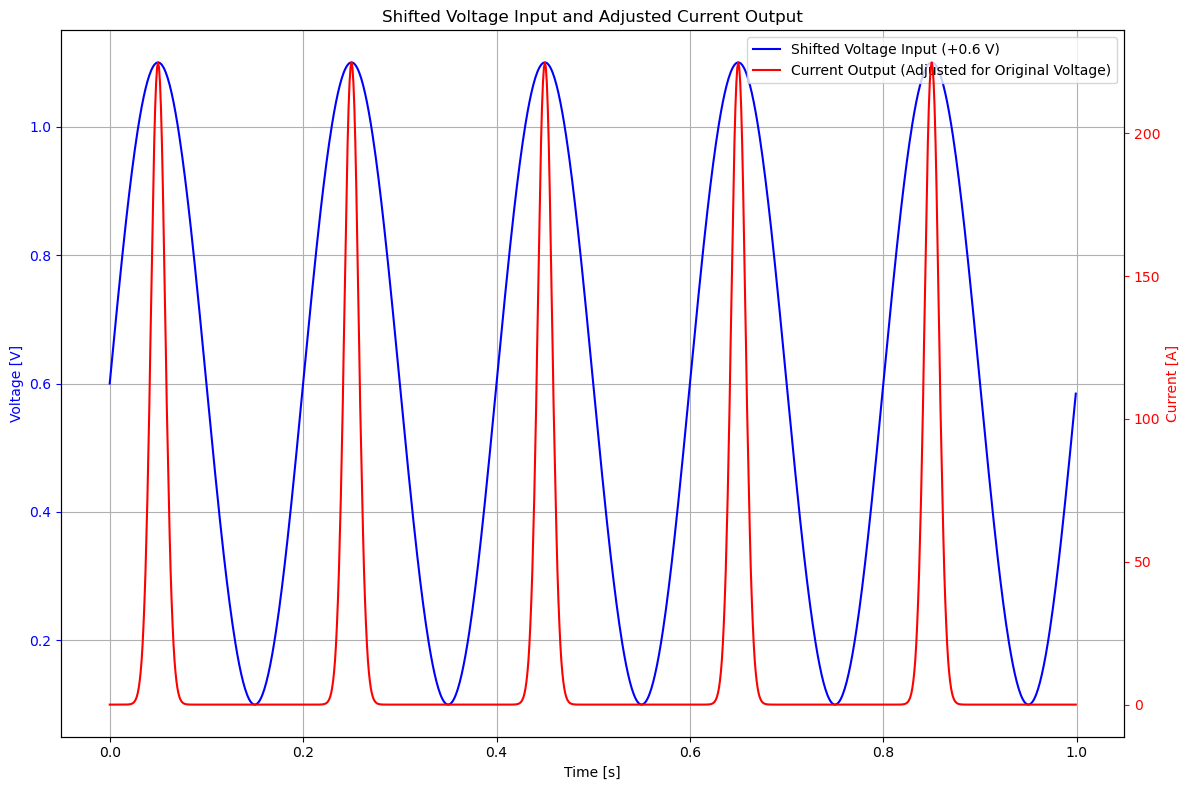

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def shift_voltage_for_current_interpolation(voltages, shift_amount=0.6):
    """
    Adjusts voltage values for current interpolation by shifting them down,
    effectively retrieving current values for the original unshifted voltage.
    
    Parameters:
        voltages (np.ndarray): Array of shifted voltage values.
        shift_amount (float): Amount to shift the voltage by, in volts, for current lookup.
    
    Returns:
        np.ndarray: Adjusted voltage values for current interpolation.
    """
    return voltages - shift_amount

# Step 1: Load the lookup table from the CSV file
lookup_table = pd.read_csv('./Downloads/diode_voltage_vs_current_lookup.csv')

# Extract voltage and current from the lookup table
voltage_lookup = lookup_table['Voltage (V)'].values
current_lookup = lookup_table['Current (A)'].values

# Step 2: Generate the sine wave voltage input
frequency = 5  # Frequency of the sine wave in Hz
amplitude = 0.5  # Amplitude of the sine wave (0.5V peak)
sampling_rate = 1000  # Sampling rate in samples per second
duration = 1  # Duration of the sine wave in seconds

# Create the time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the sine wave for voltage input
voltage_input = amplitude * np.sin(2 * np.pi * frequency * t) + 0.6  # Shift the voltage input by +0.6 V

# Adjust voltage for current interpolation
voltage_for_current_lookup = shift_voltage_for_current_interpolation(voltage_input)

# Step 3: Map the adjusted voltage to corresponding current using interpolation
current_output = np.interp(voltage_for_current_lookup, voltage_lookup, current_lookup,
                           left=current_lookup[0], right=current_lookup[-1])

# Step 4: Plot both voltage input and corresponding current output
plt.figure(figsize=(12, 8))
ax1 = plt.gca()  # Get current axes for voltage
ax1.plot(t, voltage_input, label='Shifted Voltage Input (+0.6 V)', color='blue')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]', color='blue')
ax1.tick_params(axis='y', colors='blue')
ax1.grid(True)

# Create secondary axis for current
ax2 = ax1.twinx()
ax2.plot(t, current_output, label='Current Output (Adjusted for Original Voltage)', color='red')
ax2.set_ylabel('Current [A]', color='red')
ax2.tick_params(axis='y', colors='red')

# Adding a legend that combines both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Shifted Voltage Input and Adjusted Current Output')
plt.tight_layout()
plt.show()


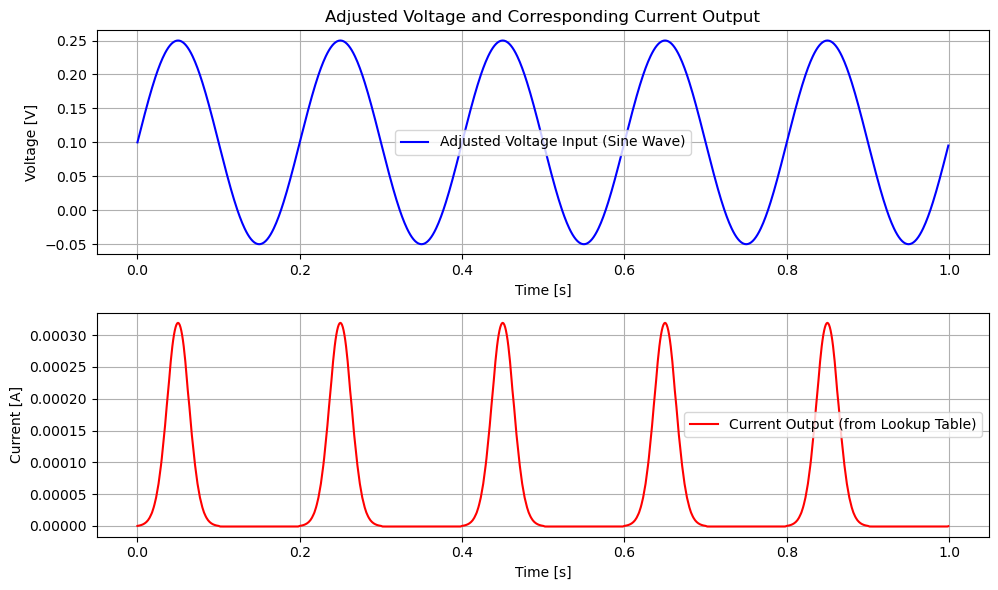

In [30]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Load the lookup table from the CSV file
lookup_table = pd.read_csv('./Downloads/diode_voltage_vs_current_lookup.csv')

# Extract voltage and current from the lookup table
voltage_lookup = lookup_table['Voltage (V)'].values
current_lookup = lookup_table['Current (A)'].values

# Step 3: Generate the sine wave voltage input
frequency = 5  # Frequency of the sine wave in Hz
amplitude = 0.15  # Amplitude of the sine wave (1V peak)
sampling_rate = 1000  # Sampling rate in samples per second
duration = 1  # Duration of the sine wave in seconds

# Create the time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the sine wave for voltage input
voltage_input = amplitude * np.sin(2 * np.pi * frequency * t)

# Step 4: Adjust the voltage input by adding 0.1V without changing the current mapping
adjusted_voltage_input = voltage_input + 0.1

# Interpolate based on the original lookup table voltage for current (voltage -> current)
# Using the original voltage_input for current interpolation (no change in current)
current_output = np.interp(voltage_input, voltage_lookup, current_lookup)

# Step 5: Plot both adjusted voltage input and corresponding current output

plt.figure(figsize=(10, 6))

# Plot the adjusted input voltage sine wave (shifted by 0.1V)
plt.subplot(2, 1, 1)
plt.plot(t, adjusted_voltage_input, label='Adjusted Voltage Input (Sine Wave)', color='b')
plt.title('Adjusted Voltage and Corresponding Current Output')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid(True)
plt.legend()

# Plot the corresponding current output wave (unchanged from the original voltage mapping)
plt.subplot(2, 1, 2)
plt.plot(t, current_output, label='Current Output (from Lookup Table)', color='r')
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


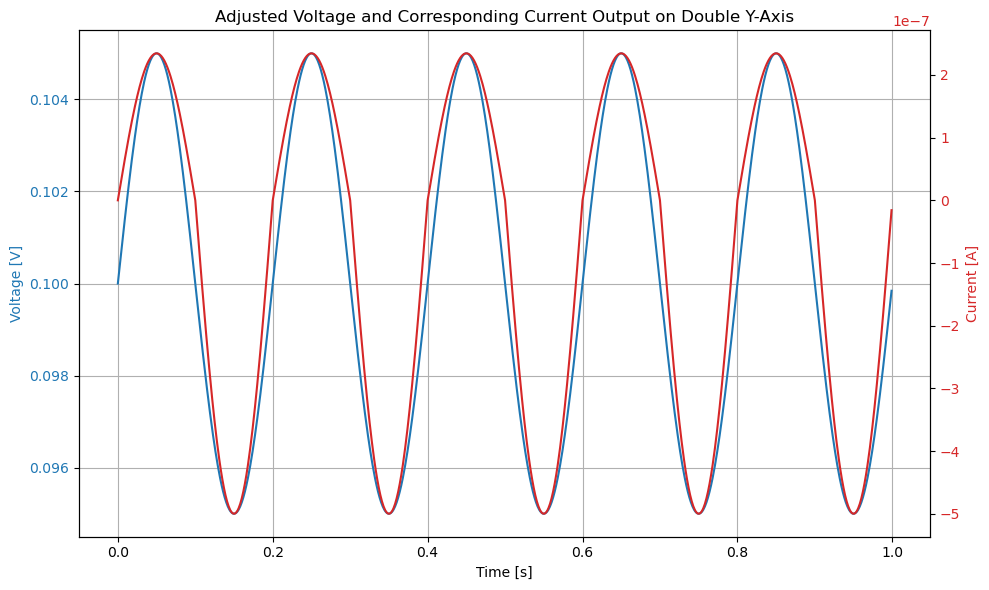

In [23]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Load the lookup table from the CSV file
lookup_table = pd.read_csv('./Downloads/diode_voltage_vs_current_lookup.csv')

# Extract voltage and current from the lookup table
voltage_lookup = lookup_table['Voltage (V)'].values
current_lookup = lookup_table['Current (A)'].values

# Step 3: Generate the sine wave voltage input
frequency = 5  # Frequency of the sine wave in Hz
amplitude = 0.5  # Amplitude of the sine wave (1V peak)
sampling_rate = 1000  # Sampling rate in samples per second
duration = 1  # Duration of the sine wave in seconds

# Create the time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the sine wave for voltage input
voltage_input = 0.01 * amplitude * np.sin(2 * np.pi * frequency * t)

# Step 4: Adjust the voltage input by adding 0.1V without changing the current mapping
adjusted_voltage_input = voltage_input + 0.1

# Interpolate based on the original lookup table voltage for current (voltage -> current)
# Using the original voltage_input for current interpolation (no change in current)
current_output = np.interp(voltage_input, voltage_lookup, current_lookup)

# Step 5: Plot both adjusted voltage input and corresponding current output on double y-axis

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the adjusted input voltage sine wave (shifted by 0.1V) on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]', color=color)
ax1.plot(t, adjusted_voltage_input, label='Adjusted Voltage Input (Sine Wave)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Current [A]', color=color)  # Label for the second y-axis
ax2.plot(t, current_output, label='Current Output (from Lookup Table)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and adjust the layout
plt.title('Adjusted Voltage and Corresponding Current Output on Double Y-Axis')

# Show the plot
plt.tight_layout()
plt.show()



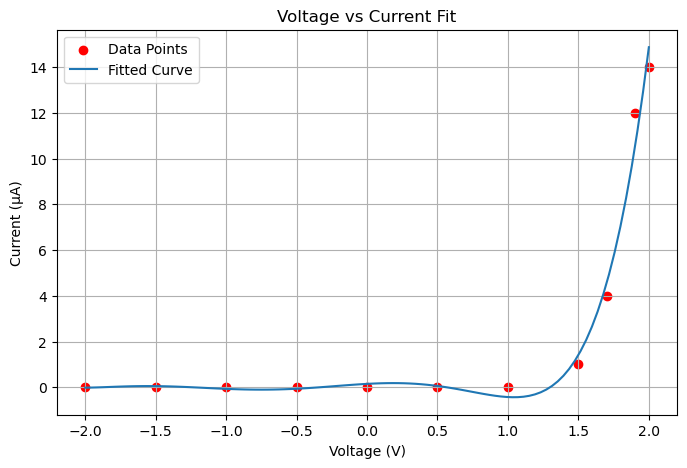

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Data points based on the lookup table
voltages = np.array([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 1.7, 1.9, 2.0])
currents = np.array([0, 0, 0, 0, 0, 0, 0, 1, 4, 12, 14])

# Fit a polynomial curve - degree can be adjusted for better fit
degree = 6
coefficients = np.polyfit(voltages, currents, degree)
polynomial = np.poly1d(coefficients)

# Generate some x values for plotting the fitted curve
x_values = np.linspace(-2, 2, 100)
y_values = polynomial(x_values)

# Plotting the original data points and the fitted curve
plt.figure(figsize=(8, 5))
plt.scatter(voltages, currents, color='red', label='Data Points')  # original data points
plt.plot(x_values, y_values, label='Fitted Curve')  # fitted curve
plt.title('Voltage vs Current Fit')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (μA)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from pynq.overlays.base import BaseOverlay
from pynq.lib.pmod import Pmod_ADC, Pmod_DAC

# Load the base overlay
base = BaseOverlay("base.bit")

# Initialize ADC on PMOD-A and DAC on PMOD-B
adc = Pmod_ADC(base.PMODA)
dac = Pmod_DAC(base.PMODB)

# Sampling parameters
sampling_rate = 100    # samples per second
duration = 10          # seconds

# Function to read from ADC and send to DAC
def adc_to_dac_sine_conversion():
    samples = []  # store ADC samples for plotting
    
    # Generate samples over a period of time
    for _ in range(int(sampling_rate * duration)):
        # Read analog value from ADC (12-bit value)
        adc_value = adc.read()
        samples.append(adc_value)
        
        # Convert ADC value to voltage (assuming 3.3V reference)
        voltage = (adc_value[0] / 4096.0) * 3.3
        voltage = voltage/2
        # Output the voltage to DAC
        dac.write(voltage)
        
        # Small delay to match the desired sampling rate
        time.sleep(1.0 / sampling_rate)

# Run the ADC to DAC sine wave conversion
adc_to_dac_sine_conversion()
